# Optimization and Root Finding



## A general remark on optimization vs. root finding


_**Optimization**_ and _**root finding**_ are two very closely related topics. They deal with different types of problems but the numerical methods could look similar. Sometimes, people may even formulate a root finding problem as an optimization problem and vice versa. However, doing so is almost always sub-optimal or even incorrect. It's better to use tools designed for specific problems.

So, what are optimization and the root-finding problems? How do they relate to each other?


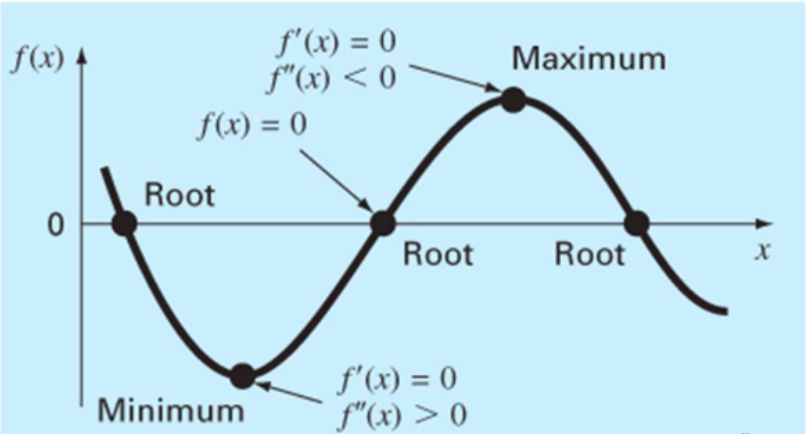


### What is a root finding problem?


> <div class="alert alert-block alert-info">
>  Given a continuous function $f(x)$ , the root of the function is the value of $x$ that makes the value of $f(x)$ equal to 0. Finding the value of $x$  that satisfied $f(x)=0$  is a root-finding problem.</div>


- $f(x)=b \quad \Longrightarrow \quad f(x)-b=0$;
- $f(x)=h(x) \quad \Longrightarrow \quad f(x)-h(x)=0$.

When would we need it? Solving nonlinear equations, solving a system of equations, etc.

### What is an optimization problem?

> <div class="alert alert-block alert-info">
> Given a function $f(x)$ , an optimization problem is one that finds the value of $x$ that yields the smallest value (minimization problem) or the largest value (maximization problem) of $f(x)$.</div>

- A minimization problem of $f(x)$ is equivalent to the maximization problem of $-f(x)$.

When would we need it? When conducting analysis involving utility maximization, cost minimization, and profit maximization. Or, when estimating an econometric model using the maximum likelihood method.

<div class="alert alert-block alert-success">
Sometimes the term <b>mathematical optimization</b> is used as an umbrella under which different types of optimization problems exist. This lecture focuses on the type of <b>unconstrained optimization</b> with concave (or convex for minimization) functions. Other types include <b>linear programming</b> (LP) where the objective function is linear and is subject to linear equality and/or linear inequality constraints. LP is widely used in operation research to solve problems such as bus scheduling or logistic supply. A simple cost minimization problem, where the total cost is the sum of individual factor's cost, may also apply. However, LP uses algorithms that are not covered in this lecture. There are also <b>quadratic programming</b>, <b>convex optimization</b>, etc., each deals with specific type of problems where the objective function and the constraint equations have specific forms.
</div>    





### Could we formulate a root-finding problem as an optimization problem?

Suppose the root-finding problem is $f(x)=b$, or, $f(x)-b=0$. The following methods may look technically possible.


- Convert it to an unconstrained optimization problem: Minimize the objective function $||f(x)-b||^2$. Since the norm is bounded below at 0 and $||f(x)-b||^2$ is 0 if $f(x)=b$, so if $x^*$ minimizes $||f(x)-b||^2$ it would also make $f(x^*)=b$.


- Convert it to a constrained optimization problem: $min_x 1 \ \ s.t.\ \ f(x)=b$. If the problem is solved by $x^*$, the constraint would have to be satisfied which leads to $f(x^*)=b$.


However, as we mentioned earlier, it is always sub-optimal to do things this way. One of the reasons is because that a *well-thought-out* optimization software would utilize information that is often not needed for root-finding problems, and so the optimization approach is overkill and less efficient. For instance, if we want to find the maximizer of $f(x)$ and we are currently at $x=x_0$ where the slope of $f(x=x_0)$ is positive, then we know the maximizer is likely on the *right* of $x_0$. Then we should increase the value of $x$ and moves on. This piece of information is generally not needed for root-finding problems.  

### How about converting an optimization into a root-finding problem?

Here we will use slightly more complicated notations to illustrate an optimization problem. We will use the model and the notations in the rest of the lecture. A generic maximization problem we commonly see in economics may be represented as:

$$\begin{equation}
\max_\theta L(\theta;X). 
\end{equation}$$

In this example, $L(\cdot)$ is the objective function (e.g., likelihood function, utility function, profit function, etc.), $\theta$ is a vector of parameters, and $X$ is a vector of exogenous variables (e.g., consumption, production inputs, etc.). Our task is to look for the values of $\theta$ that would optimize the objection function. 

There are various ways to find the solution. One way is to solve from the first-order conditions:

\begin{equation}
 \frac{\partial L(\theta;X)}{\partial \theta} = 0. \label{eq:foc} 
\end{equation}

That is, provided that the second-order condition is also satisfied, the value of $\theta$ that satisfied the above equation would be the ones that maximize the objective function. If we defined the part of the left-hand-side of the equation as $g(\theta;x)$, then the first-order condition may be written as 

$$\begin{equation}
 g(\theta;x) = 0. \label{eq:foc2}
\end{equation}$$

Numerically solving $\theta$ from \eqref{eq:foc2} is a _**root finding**_ problem.

Note that this first-order-condition approach is only one of the methods for the optimization problem, and it requires you to derive the first-order conditions explicitly and it does not use all of the information available to find the maximum or minimum of the function. Quite often, it is not the best approach for solving the minimization/maximization problem. 

## Root Finding Methods


### bisection method (univariate)

This method is easy to implement and does not require calculating derivatives of the function. It is based on the _**intermediate value theorem**_.


> <div class="alert alert-block alert-info"> <b>Intermediate Value Theorem:</b> If a continuous function $f$ defined on $[a, b]$ satisfies $f(a)f(b) < 0$, then there exists $\theta^* \in [a, b]$ such that $f(\theta^*) = 0$.

At each iteration, divide the interval $[a, b]$ into two subintervals and evaluate $f$ at the midpoint. Discard the subinterval that does not contain the root and continue with the other interval. The procedure may be summarized as follows.


>###### Step 1. Pick an interval $[a, b]$ that contains the root. That is, make sure that $f(a)f(b) < 0$. 
>###### Step 2. Find the midpoint of the interval $p = a + (b-a)/2$.  
>###### Step 3. If $f(p)=0$ or $|a-b|<\varepsilon$, declare convergence. Otherwise, continue.
>###### Step 4. Determine which interval, $[a, p]$ or $[p,b]$ contains the root, and repeat the steps above.



### Newton's method of root finding: univariate

> <div class="alert alert-block alert-info">
> To put it simply, the Newton's method of root-finding uses a <b>linear function</b> to approximate the objective function $g(x)$ at $x=x_0$, and the root of the former (call $x_1$) is considered the root of the latter. If, after evaluating, $x_1$ is not good enough for $g(x)$, another round of linear approximation to $g(x)$ at $x=x_1$ is carried out and the new root is considered and evaluated. The process continues until the root of the approximated linear function is a *good* solution for $g(x)=0$.
>     
> The method is also referred to as the <b>Newton-Raphson</b> method.       
> </div>

In [1]:
# Newton root finding 

# The following requires `Plots` version v1.25.10 or newer.
# Check your version: using Pkg; Pkg.status("Plots")
# If need to update: using Pkg; Pkg.update("Plots")

using Interact, WebIO, Plots

f(x) = 7/x-2
sec(x, a, h) = ((f(a+h)-f(a))/h) * (x-a) + f(a)    # secant line function (tangent line when h is arbitrarily small)

ϵ = 1e-7
θ₀ = 1.2
θ₁ = θ₀ + abs(f(θ₀)/((f(θ₀+ϵ)-f(θ₀))/ϵ))
θ₂ = θ₁ + abs(f(θ₁)/((f(θ₁+ϵ)-f(θ₁))/ϵ))
sec_1(x) = sec(x,θ₀, ϵ)
sec_2(x) = sec(x,θ₁, ϵ)
sec_3(x) = sec(x,θ₂, ϵ)

@manipulate for i in (1,2,3,4,5,6,7)
    plot(size=(600,400), aspect_ratio=.5, xlim=[1,4.5], ylim=[0,4.5])
    plot!(f, label="f(x)", linewidth=2, color=:blue)
    scatter!(i >= 2 ? ([θ₀],[f(θ₀)]) : ([],[]), label=false)
    annotate!([θ₀+0.1], [f(θ₀)], text(i >= 2 ? "f(θ₀)" : "", :left, 9))
    quiver!([θ₀], [0], quiver= i >= 2 ? ([0],[f(θ₀)]) : ([0],[0]), ls=:dash, color=:green)
    annotate!([θ₀], [0], text(i >= 2 ? "θ₀" : "", 9))
    plot!(i >= 3 ? sec_1 : (), label=false, color=:green)
    annotate!([θ₁], [0], text(i >= 3 ? "θ₁" : "", 9))
    quiver!([θ₁], [0], quiver= i >= 4 ? ([0],[f(θ₁)]) : ([0],[0]), ls=:dash, color=:purple)
    scatter!(i >= 4 ? ([θ₁],[f(θ₁)]) : ([],[]), label=false)
    annotate!([θ₁+0.1], [f(θ₁)], text(i >= 4 ? "f(θ₁)" : "", :left, 9))
    plot!(i >= 5 ? sec_2 : (), label=false, color=:purple)
    annotate!([θ₂], [0], text(i >= 5 ? "θ₂" : "", 9))
    quiver!([θ₂], [0], quiver= i >= 6 ? ([0],[f(θ₂)]) : ([0],[0]), ls=:dash, color=:red)
    scatter!(i >= 6 ? ([θ₂],[f(θ₂)]) : ([],[]), label=false)
    annotate!([θ₂+0.1], [f(θ₂)], text(i >= 6 ? "f(θ₂)" : "", :left, 9))
    plot!(i >= 7 ? sec_3 : (), label=false, color=:red)
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "1", "val" => 1, "id" => "idPrSPZEe1"), OrderedDict{String, Any}("key" => "2", "val" => 2, "id" => "idspXLayLn"), OrderedDict{String, Any}("key" => "3", "val" => 3, "id" => "idNLMkU5XY"), OrderedDict{String, Any}("key" => "4", "val" => 4, "id" => "id6QriCPoF"), OrderedDict{String, Any}("key" => "5", "val" => 5, "id" => "idvVALcIod"), OrderedDict{String, Any}("key" => "6", "val" => 6, "id" => "idw9yi4wV4"), OrderedDict{String, Any}("key" => "7", "val" => 7, "id" => "idoqNy8f0S")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000b317c20, Task (runnable) @0x000000000b317c20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if 

Suppose we have a function $y = g(\theta)$ and we want to solve the value $\theta^*$ such that $y = g(\theta^*)=0$. The following is the procedure.


>###### 1. Provide (guess) an initial value $\theta_0$ and calculate $g(\theta_0)$ and $g'(\theta_0)$.
>    - The closer $\theta_0$ is to $\theta^*$, the better.
>
>
>###### 2. Derive a linear function $h(\theta)$ (using Taylor expansion) that approximates $g(\theta)$ at the point $\theta = \theta_0$. 
>    \begin{equation} 
     g(\theta) \approx \underbrace{g(\theta_0) + g'(\theta_0)(\theta-\theta_0)}_{\equiv h(\theta)}.
    \end{equation}  
>> <div class="alert alert-block alert-info"><b>Taylor series expansion:</b>
>> $g(x) \approx g(a) + \frac{g'(a)}{1!}(x-a) + \frac{g''(a)}{2!}(x-a)^2 + \frac{g'''(a)}{3!}(x-a)^3 + \ldots$</div>
>
>    - Graphically, it is a tangent line of $g(\theta)$ at $\theta=\theta_0$.
>
>
>###### 3. Solve the root of $h(\theta)$ and call it $\theta_1$ which is the approximated root of $g(\theta)$. It is solved from:
>  \begin{aligned}
     & h(\theta) = g(\theta_0) + g'(\theta_0)(\theta_1-\theta_0)  = 0, \\
     \\
    \Longrightarrow \quad & \theta_1 - \theta_0  = -\frac{g(\theta_0)}{g'(\theta_0)},\\
    \\
    \Longrightarrow \quad & \theta_1  = \theta_0  -\frac{g(\theta_0)}{g'(\theta_0)}.
   \end{aligned} 
>  - More generally, the **updating equation** is
>
>   \begin{equation}
    \theta_{i}  = \theta_{i-1}  -\frac{g(\theta_{i-1})}{g'(\theta_{i-1})}.\label{eq:nupdate_uni}
   \end{equation} 
>   
>
>  - Because $h(\theta)$ is only an approximation of $g(\theta)$, the root of the former ($\theta_1$) may not be the exact root of the latter ($\theta^*$). Nevertheless, compared to $\theta_0$, $\theta_1$ should now be closer to $\theta^*$. Thus, we could use $\theta_1$ as the new point to derive another approximation function $h()$ and obtain another approximated root $\theta_i$ which should be even closer to $\theta^*$. We repeat the process over and over again and eventually the root of the approximation function is sufficiently close to $\theta^*$.
>
>
>###### 4. Repeat the process until $|\theta_i - \theta_{i-1}| \leq \varepsilon$ ("_**converged**_") where $\varepsilon$ is a pre-specified value of tolerance (e.g., 1e-7).

#### Remarks
- Newton's method will fail if $g'(\theta_i) = 0$ for some $i$. Graphically, it means the tangent line is parallel to the x-axis so we cannot get the x-intercept.

- Newton's method may fail to converge if the initial guess $\theta_0$ is not close to the true value $\theta^*$: In the following graph, either choice for p0 results in a sequence that oscillates between two points.
  - 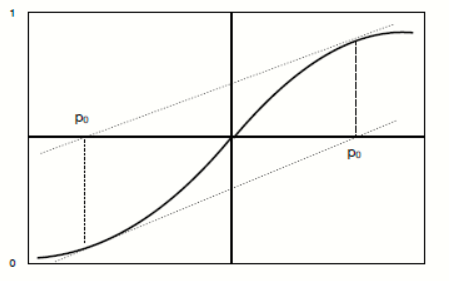



### Fixed-point iteration

Many root-finding methods can be represented as the fixed-point iteration. Put differently, the fixed-point iteration is a framework which nests other methods as special cases. We will not discuss this method in depth and some basic concepts should suffice.

><div class="alert alert-block alert-info"> 
> <b>Root-finding problem:</b> Find $\theta^*$ such that $g(\theta^*) = 0$.<br>
> <b>Fixed-point problem:</b> Find $\theta^*$ such that $h(\theta^*) = \theta^*$.
</div>

We can formulate a root-finding problem as a fixed-point problem, and vice versa. For
example, consider a root-finding problem of $g(\theta) = 0$.

- Define $h(\theta) = \theta-g(\theta)$.
- If $\theta^*$ is a fixed-point of $h(\theta)$, that is, $h(\theta^*) = \theta^* - g(\theta^*) = \theta^*$, then the result implies $g(\theta^*)=0$. It means $\theta^*$ is the root of $g(\theta)$.
- Thus, the root-finding problem of $g(\theta)$ is transformed to the fixed-point problem of $h(\theta)$, where $h(\theta) = \theta-g(\theta)$.

So how exactly does the fixed-point method work? Let's demonstrate it graphically.

In [8]:
using Interact, WebIO, Plots

h_0(x) = x
h(x) = x/3 + 1
θ₀ = 4.5
θ₁ = h(θ₀)
θ₂ = h(θ₁)

@manipulate for i in (1,2,3,4,5,6)
    plot(size=(500,500), aspect_ratio=1, xlim=[0,5], ylim=[0,5], xlabel="θ", ylabel="h(θ)")
    plot!(h_0, label="h(θ)=θ")
    plot!(h, label="h(θ)")
    plot!(i >= 2 ? ([θ₀,θ₀], [-1,h_0(θ₀)+1]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([θ₀], [0], text(i >= 2 ? "θ₀" : "", 11))
    plot!(i >= 3 ? ([-1,θ₀], [h(θ₀),h(θ₀)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([0.1], [h(θ₀)+0.1], text(i >= 3 ? "h(θ₀)" : "", 10))
    plot!(i >= 4 ? ([θ₁,θ₁], [-1,h(θ₀)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([h(θ₀)], [0], text(i >= 4 ? "θ₁=h(θ₀)" : "", 8))
    plot!(i >= 5 ? ([-1,θ₁], [h(θ₁),h(θ₁)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([0.1], [h(θ₁)+0.1], text(i >= 5 ? "h(θ₁)" : "", 10))
    plot!(i >= 6 ? ([θ₂,θ₂], [-1,h(θ₁)]) : ([],[]), ls=:dash, color=:green, label=false)
    annotate!([θ₂], [0], text(i >= 6 ? "θ₂=h(θ₁)" : "", 8))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "1", "val" => 1, "id" => "idNPkNkXXs"), OrderedDict{String, Any}("key" => "2", "val" => 2, "id" => "iddgIuSHVB"), OrderedDict{String, Any}("key" => "3", "val" => 3, "id" => "idwwxg1rUY"), OrderedDict{String, Any}("key" => "4", "val" => 4, "id" => "idWwsFVeZ8"), OrderedDict{String, Any}("key" => "5", "val" => 5, "id" => "idoCCo3kQm"), OrderedDict{String, Any}("key" => "6", "val" => 6, "id" => "id4PVV2Eq0")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\user\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\user\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\user\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\user\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\user\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000bdbeca0, Task (runnable) @0x000000000bdbeca0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n      

Fixed-point iteration methods have a few appealing features, one of which is that the updating equation is rather straightforward:

\begin{equation}
  \theta_{i} = h(\theta_{i-1}).
\end{equation}

If $h(\theta)$ satisfies certain properties (among them, $h'(\theta^*)<1$), then the iteration would converge in the numerical sense that $|\theta_{i} - \theta_{i-1}| < \varepsilon$.

So, should we always convert a root-finding problem ($g(\theta)=0$) to a fixed-point problem ($h(\theta)=\theta$)? Well, notice that the conversion is not unique: $h(\theta) = \theta - g(\theta)$ and $h(\theta) = \theta + 2g(\theta)$ both look like reasonable conversions. However, there is no guarantee that the converted $h(\theta)$ would satisfy the required properties and therefore no guarantee of convergence in the iteration. You have to choose the conversion function wisely.

Note that the Newton's method can be treated as a fixed-point problem in which the conversion function is guaranteed to converge at least locally. To see that the Newton's method is a fixed-point method, you only need to define the right-hand-side of Newton's updating equation to be $h(\theta_{i-1})$, then you have $\theta_i = h(\theta_{i-1})$ which is a fixed-point problem.

## Optimization

Here we introduce methods for estimating unconstrained maximization problems with continuous functions.


| type              |                   category                  | method name                                              |
|:------------------|:-------------------------------------------:|----------------------------------------------------------|
| 1. non-gradients  |                 grid search                 |                                                          |
| 1. non-gradients  |                simplex method               | **Nelder-Mead**                                          |
| 1. non-gradients  |                   others                    | simulated annealing,<br> particle swarm, etc.            |
| 2. gradient-based |           based only on gradients           | **gradient ascent**,<br> **conjugate gradient ascent**, etc. |
| 2. gradient-based |        based on gradients and Hessian       | **Newton-Raphson**,<br> Newton with trust region, etc.   |
| 2. gradient-based | based on gradients and approximated Hessian | **BFGS, DFP, BHHH**                                      |

### Bracketing (univariate)

><div class="alert alert-block alert-info"> 
> Using only the function value to identify an interval in which the minimum/maximum lies.
></div>

- May use the interval to find/refine initial values, or, continue to shrink the interval and find solutions

- The method requires $f(x)$ to be **unimodality**:

  - A unimodal function $f(x)$ is one where there is a unique $x^*$  that minimize/maximize the function.
  
  - $f(x)$ is monotonically decreasing for $x\leq x^*$ and monotonically increasing for $x \geq x^*$. 

  - We can *bracket* an interval $[a, c]$ containing the global minimum/maximum if we can find three points $a < b < c$ such that $f(a) > f(b) < f(c)$.

  - Non-unimodal functions, such as exp(x), cannot be bracketed.
  

#### A Simple Bracketing Method 

The goal: Given a point $a$, find a bracket $[a,c]$ which would bracket the minimum in between. For the maximum, just doing the opposite.

- Start at a given point and take a step "$s$" in the positive direction (i.e., $s=1$e-2). 
  - $(a, f(a)) \rightarrow (a+s, f(a+s)) = (b, f(b))$ where $s>0$.
  
- Find the downhill direction by comparing $f(a)$ and $f(b)$.
  - If $f(b) > f(a)$, then we should move in the opposite direction. It means we should set $s<0$.
 
- Move in the correct direction. Following from the above, it should be the negative direction.
  - $(a, f(a)) \rightarrow (a-s, f(a-s)) = (c, f(c))$

- Compare the new ($f(c)$) value to the old ($f(a)$) value. The new value would be continuing decreasing if it has not exceeds the lowest point. Stop when $f(b) > f(a)$.

- We often gradually increase the step size $s$ by updating it according to $s = k*s$ where $k = 1, 2, \ldots$. The idea is to go as far as possible.


#### Other Bracketing Methods

There are other more refined methods, including the Fibonacci search, golden section search, quadratic fit search, Shubert-Piyavskii method, etc.



### Newton's Method for optimization: univariate

> <div class="alert alert-block alert-info"> 
> To put it simply, the Newton's method of optimization uses a <b>quadratic function</b> to approximate the objective function $f(\theta)$ at $\theta_0$, and the maximizer $\theta_1$ (in the case of maximization) of the former is considered the maximizer of the latter. If, after evaluating, $\theta_1$ is not good enough for $f(\theta)$, another round of quadratic approximation to $f(\theta)$ at $\theta=\theta_1$ is carried out and the new maximizer is considered and evaluated. The process continues until the maximizer of the approximated quadratic function is a <i>good</i> solution for maximizing $f(\theta)$.
>
> The method is also referred to as the <b>Newton-Raphson</b> method.
> </div>


In [1]:
# Newton method optimization

# The following requires `Plots` version v1.25.10 or newer
# Check your version: using Pkg; Pkg.status("Plots")
# If need to update: using Pkg; Pkg.update("Plots")

using Interact, WebIO, Plots

ϵ = 1e-7

g(x) = -(1/50)*(x^4+x^2) + 5.5
derive_1(a) = (g(a+ϵ)-g(a))/ϵ                      # first derivative
derive_2(a) = (derive_1(a+ϵ)-derive_1(a))/ϵ        # second derivative
t(x, x_0) = g(x_0) + derive_1(x_0)*(x-x_0) + (1/2)*derive_2(x_0)*(x-x_0)^2        # 2nd order taylor series at x_0 

x₀ = -3.3
x₁ = x₀ - derive_1(x₀)/derive_2(x₀)
x₂ = x₁ - derive_1(x₁)/derive_2(x₁)
x₃ = x₂ - derive_1(x₂)/derive_2(x₂)
h_1(x) = t(x,x₀)
h_2(x) = t(x,x₁)
h_3(x) = t(x,x₂)

@manipulate for i in (1,2,3,4,5,6,7,8)
    plot(g, aspect_ratio=1, xlim=[-4,4], ylim=[0,6], label="g(x)", linewidth=3)

    scatter!(i >= 2 ? ([x₀], [g(x₀)]) : ([],[]), label=false)                                        
    annotate!([x₀+0.1], [g(x₀)], text(i >= 2 ? "g(x₀)" : "", :left, 9))
    quiver!([x₀], [0], quiver= i >= 2 ? ([0],[g(x₀)]) : ([0],[0]), ls=:dash, color=:green)
    annotate!([x₀], [0], text(i >= 2 ? "x₀" : "", 9))
    plot!(i >= 3 ? h_1 : (), label=false, color=:green)

    scatter!(i >= 4 ? ([x₁], [g(x₁)]) : ([],[]), label=false)
    annotate!([x₁-.1], [g(x₁)+.4], text(i >= 4 ? "g(x₁)" : "", :left, 9))
    quiver!([x₁], [0], quiver= i >= 4 ? ([0],[g(x₁)]) : ([0],[0]), ls=:dash, color=:purple)
    annotate!([x₁], [0], text(i >= 4 ? "x₁" : "", 9))
    plot!(i >= 5 ? h_2 : (), label=false, color=:purple)

    scatter!(i >= 6 ? ([x₂], [g(x₂)]) : ([],[]), label=false)
    annotate!([x₂-.2], [g(x₂)+.3], text(i >= 6 ? "g(x₂)" : "", :left, 9))
    quiver!([x₂], [0], quiver= i >= 6 ? ([0],[g(x₂)]) : ([0],[0]), ls=:dash, color=:red)
    annotate!([x₂], [0], text(i >= 6 ? "x₂" : "", 9))
    plot!(i >= 7 ? h_3 : (), label=false, color=:red)
    
    scatter!(i >= 8 ? ([x₃], [g(x₃)]) : ([],[]), label=false)
    annotate!([x₃], [g(x₃)+.3], text(i >= 8 ? "g(x₃)" : "", :left, 9))
    quiver!([x₃], [0], quiver= i >= 8 ? ([0],[g(x₃)]) : ([0],[0]), ls=:dash, color=:blue)
    annotate!([x₃], [0], text(i >= 8 ? "x₃" : "", 9))    
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "1", "val" => 1, "id" => "idbPyFZ3UZ"), OrderedDict{String, Any}("key" => "2", "val" => 2, "id" => "idusEymiYe"), OrderedDict{String, Any}("key" => "3", "val" => 3, "id" => "idzVAIQZF9"), OrderedDict{String, Any}("key" => "4", "val" => 4, "id" => "id6yilOTwE"), OrderedDict{String, Any}("key" => "5", "val" => 5, "id" => "idKquOhxqt"), OrderedDict{String, Any}("key" => "6", "val" => 6, "id" => "idtWpotbvi"), OrderedDict{String, Any}("key" => "7", "val" => 7, "id" => "idb1cLneDF"), OrderedDict{String, Any}("key" => "8", "val" => 8, "id" => "idQJsFJd9T")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\user\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\user\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\user\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\user\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\user\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000e1bba30, Task (runnable) @0x000000000e1bba30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf

Suppose we are interested in the following problem.

\begin{equation}
  \max_\theta f(\theta)
\end{equation} 


Looking at the formula, Newton's method for finding roots can be converted to finding the minimum and the maximum of a function $f(\theta)$ by substituting $f'()$ for $g()$ and $f''()$ for $g'()$. So, the updating equation is essentially:
   \begin{equation}
    \theta_{i}  = \theta_{i-1}  -\frac{f'(\theta_{i-1})}{f''(\theta_{i-1})}.
   \end{equation} 

Intuitively, it *looks like* we are solving for the roots of the maximization problem's first-order conditions, although we'll show that the the result is derived using a different approach. To see that the result *looks like* the root of the problem's FOC, you only need to note that the FOC of the optimization problem is $f'(\theta) = 0$ and solving $\theta^*$ from the FOC is a root-finding problem. If we define $g(\theta) = f'(\theta)$, the updating equation would be exactly the same as the one we introduced in the root-finding section. 


Let's derive the result formally. It's straightforward and can be decomposed into two steps:


- **Use the 2nd-order Taylor series to approximate the function $f(\theta)$ at $\theta_0$. Call it $h(\theta)$.**

\begin{equation}
 f(\theta) \approx  \underbrace{f(\theta_0) + f'(\theta_0)(\theta-\theta_0) + \frac{1}{2}f''(\theta_0)(\theta-\theta_0)^2}_{\equiv h(\theta)}.
\end{equation}


- **Find the maximizer of $h(\theta)$ by applying the first-order condition (e.g., $h'(\theta)=0$).**

\begin{align}
  h'(\theta) & = f'(\theta_0) + f''(\theta_0)(\theta-\theta_0)=0, \\
 \notag \\
\Longrightarrow \quad   \theta & = \theta_0 - \frac{f'(\theta_0)}{f''(\theta_0)}.
\end{align}



The idea of Newton's optimization method is intuitive: Start from a given point $\theta_0$, we use a quadratic function $h(\theta)$ evaluated at $\theta=\theta_0$ to approximate the objective function $f(\theta)$. We then use $h(\theta)$'s maximizer (call it $\theta_1$) as a proxy for $f(\theta)$'s maximizer (call it $\theta^*$). Because $h(\theta)$ is only an approximation to $f(\theta)$, $\theta_1$ would not, in general, be exactly equal to $\theta^*$. Nevertheless, $\theta_1$ should be closer to $\theta^*$ than $\theta_0$ is. That is, we are moving closer to the true value. We can repeat the iterative process until $\theta_j$ is sufficiently close to $\theta^*$. 

We summarize the process as follows.



>
>###### 1. Provide (guess) an intial value $\theta_0$ and calculate $f'(\theta_{0})$ and $f''(\theta_{0})$.
>
>
>###### 2. Derive a quadratic function $q(\theta)$ (using Taylor expansion) that approximates $f()$ at the point $\theta = \theta_0$.
> \begin{equation}
 f(\theta) \approx  \underbrace{f(\theta_0) + f'(\theta_0)(\theta-\theta_0) + \frac{1}{2}f''(\theta_0)(\theta-\theta_0)^2}_{\equiv q(\theta)}.
\end{equation}
>
>
>######  3. Solve the minimum/maximum of $q(\theta)$ and call the answer $\theta_1$. It can be considered the approximated minimum/maximum of $f(\theta)$. 
>
>    - The minimum/maximum of $q(\theta)$ is solved by using the first-order condition: $q'(\theta)=0$.
>
>    \begin{align}
  q'(\theta) & = f'(\theta_0) + f''(\theta_0)(\theta-\theta_0)=0, \\
  \notag \\
\Longrightarrow \quad   \theta_1 & = \theta_0 - \frac{f'(\theta_0)}{f''(\theta_0)}.
\end{align}
>
>    - More generally, the updating equation is 
>  \begin{equation}
    \theta_{i}  = \theta_{i-1}  -\frac{f'(\theta_{i-1})}{f''(\theta_{i-1})}.
   \end{equation} 
>
>
>###### 4. Repeat the process until some convergence criterion is met. Such as:
>  - based on the change in the function value: $|f(\theta_i) - f(\theta_{i-1})| \leq \varepsilon$,
>  - based on the change of the parameter value: $|\theta_i - \theta_{i-1}| \leq \varepsilon$,
>  - based on the size of the derivative: $|f'(\theta_i)| \leq \varepsilon$.

####  Refinement: Choosing the Step Size (*line search*)

- Note that the term $d = -\frac{f'(\theta_{i-1})}{f''(\theta_{i-1})}$ contains both the _**direction**_ and the _**distance**_ information regarding how to do the next move.
  - (_direction_:) If $d > 0$, it means $\theta_i > \theta_{i-1}$ and we should move to the right to find the solution.
  - (_distance_:) The size $|d|$ is an indicator of how far the new value $\theta_i$ is away from the true maximizer. If the size is large, it usually (though not always) means that the distance is far.

[//]: # "The size $|d|$ is an indicator of how far the new value $\theta_i$ is away from the old value $\theta_{i-1}$." 


- Ask yourself: If I know the better point is, for instance, on the right of the current point, could I take a _larger_ step to the right instead of the one indicated by $|d|$? Could I move 1.2X, 1.5X, or 3X of the distance?


- The answer is yes, and we can actually do so to take the full advantage of the current information. The idea is simple: We want to go in the direction of $d$ for as far as we possibly could, but not too far to result in overshooting. 


- The idea could actually go the other way around: It is entirely possible that going in the full size of $|d|$ could prove to be too far. In this case stepping in the 0.5X or 0.2X of the distance could be desired.


- In any event, instead of going $d$, we should go for $s\times d$ where $s>0$ is the _**step size**_. 

   \begin{align}
   \theta_{i}  & = \theta_{i-1} - s \frac{f'(\theta_{i-1})}{f''(\theta_{i-1})} \\
               & = \theta_{i-1} - s d.
   \end{align} 

  - Start with $s=1$.
  - If $f(\theta_{i-1} + d) < f(\theta_{i-1})$ (in the case of minimization), try $s=2$. If $f(\theta_{i-1} + 2d) < f(\theta_{i-1} + d)$, try $s=3$, and so on.
  - If $f(\theta_{i-1} + d) \geq f(\theta_{i-1})$, back up and try $s=0.5, 0.25$, etc.


- The step size could be calculated in a more sophisticated way and there are _**line search**_ algorithms specialized in doing it. In general, the step size is chosen to maximize the objective function.


- The refinement is useful because it reduces the number of times needed to evaluate $f'()$ and $f''()$. This time-saving issue is particularly relevant when $f'()$ and $f''()$ are expensive to evaluate. For instance, a multi-variate function with many variables (so the Hessian is large), or functions that require numerical integrations. By smartly choosing the step size $s$, we reduce the number of times that are needed to evaluate the functions. Quite a few algorithms are available for choose the optimal step size. 
 
 
  
##### Remarks

- "Step size" as defined above is also referred to as the _**gain**_ or the _**learning rate**_ (particularly in machine learning), since it indicates the extent to which new information is used to improve the existing status, thus "learning".


- I saw in some places the step size is defined as $\theta_i - \theta_{i-1}$, but this definition is used rarely.


#### Remark on Non-Concavity

- If $f''(\theta_{i-1})=0$, the updating rule would fail. Some numerical tricks could be used to try to get out of the trap.



#### Remarks on the local and the global maximum

- Newton's method starts the action by using information from $\theta_0$. The information on other parts of the objective function is not used. Because it uses information local to $\theta_0$, Newton's method is labeled as a _**local method**_ and it would converge to a _**local maximum**_ located in the neighborhood of $\theta_0$. If the objective function is unimodal, the local maximum is also the _**global maximum**_. If the objective function is multi-modal, there is no guarantee that the local maximum it converges to is the global maximum. Therefore, it is important to find initial values ($\theta_0$) that are in the neighborhood of the global maximum.


- For local methods, trying different initial values are *useful* in making sure that the solution is stable and we could feel confident in accepting it as a global maximum. It is not guaranteed, however, that the found solution is indeed the global maximum.  


- There are _**global methods**_ which search widely the parameter space and compare results before determining where to go. The methods include the particle swarm, genetic algorithm, simulated annealing, etc.. These methods, however, tend to be very slow.

#### Secant Method (approximating 2nd derivatives)

Newton's method requires the analytic form of the 2nd derivative of $f()$ to be known. Alternatively, we may numerically approximate the 2nd derivative.

There are different ways to do the 2nd-differentiation approximation (recall the method we introduced in another class). The _**secant method**_ uses the last two iterates to do the approximation. That is,

\begin{equation}
 f''(\theta_{i-1}) \approx \frac{f'(\theta_{i-1})-f'(\theta_{i-2})}{\theta_{i-1} - \theta_{i-2}}.
\end{equation}

Note that we may have $\theta_{i-1} = \theta_{i-2}+\epsilon$, and so the formula is akin to the forward difference formula of the finite difference. Substituting it into the Newton's updating equation, we have the secant-based updating equation:

\begin{align}
\theta_{i}   = \theta_{i-1} - s \frac{\theta_{i-1} - \theta_{i-2}}{f'(\theta_{i-1})-f'(\theta_{i-2})}f'(\theta_{i-1}).
\end{align} 


##### Remarks
- No additional function evaluations are needed.
- In the beginning of the optimization, we need to provide two (instead of one) initial values ($x_{0,a}$, $x_{0,b}$) to start the iteration.

### Newton's method for optimization: multivariate 


Let's find a vector $\mathbf{\theta}^*$ such that $f(\mathbf{\theta}^*)$ is maximized. A few notations first: 
- $g(\theta)$: the gradient vector of $f(\theta)$ (first derivatives).
- $H(\theta)$: the Hessian matrix of $f(\theta)$ (second derivatives).
- $s$: step size.

The optimization procedure is the follows.

>###### 1. Take an initial guess at $\mathbf{\theta}_0$.
>
>###### 2. Update the guess by choosing $\mathbf{\theta}_1$ according to
>\begin{align}
 \mathbf{\theta}_i & = \mathbf{\theta}_{i-1} - s \{H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})\\
          & = \mathbf{\theta}_{i-1} + s \{-H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})\\
          & \equiv \mathbf{\theta}_{i-1} + s  d
\end{align}
>
>
>###### 3. Repeat the process until some convergence criterion is met, such as
>  - based on the change in the function value: $|f(\theta_i) - f(\theta_{i-1})| \leq \varepsilon$,
>  - based on the norm of the changes in the parameter vector (coefficients): $||\theta_i - \theta_{i-1}|| \leq \varepsilon$,
>  - based on the norm of the gradient vector: $||g(\theta_i)|| \leq \varepsilon$.

#### Remark

- Hessian matrix is symmetric. It is said to be positive definite at a point if all the eigenvalues of the Hessian matrix are positive.

- If $-H()$ is not invertible, the Newton's method would fail. It happens if the function at the evaluation point has a ridge, a flat section, or a saddle point. All these result in flat gradients. 

- In practice, nevertheless, there are numerical tricks that may help us to get out of the situation when trouble happens. For instance, if we find $-H()$ un-invertible, we may substitute $-H()$ by the identify matrix $\mathbf I$, or $-H() + c\mathbf{I}$ for some small, positive scalar $c$, or some other matrix related to $-H()$.
  
- The method convergences quickly. When it is closer to the true minimizer, it exhibits the property of _quadratic convergence_: at each iteration, the significant digits of approximation would double.

- If the objection function itself is a quadratic function, then the 2nd-order Taylor series is not an *approximation* but the *exact same* quadratic function. It requires only one iteration to reach the maximum/minimum.

- The sequence is not guaranteed to converge.

- It can be sensitive to initial values. If the initial values are far away from the true values, the formula can be grossly inaccurate. It is therefore recommended to use grid or simplex methods, both of which do not rely on gradients, to narrow down the range of solutions before using the Newton's method.

- The number of function evaluation increases quickly with the number of parameters.

- The vanilla Newton' method has no step length, which may cause overshooting. So, step length is important.



### Quasi-Newton Methods

> <div class="alert alert-block alert-info"> 
> Computing the Hessian is expensive. Approximate the Hessian using less-expensive methods.
> </div>

Recall that the essential part of the Newton's method is calculating the direction equation $d = \{-H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})$, which involves the gradient and the Hessian. They are both expensive to evaluate, particularly for the Hessian. Various Quasi-Newton methods try to substitute the Hessian (BHHH) or the inverse Hessian (BFGS, L-BFGS, DFP) in the equation by some approximation. The hope is to retain fast convergence at a lower cost.


#### The BHHH algorithm 

The BHHH algorithm is a statistical-approximation based method which uses the outer product of gradients to approximate the negative Hessian matrix.
\begin{equation}
 -H(\theta_i) \approx -\tilde{H}(\theta_i) = \sum_{j=1}^{N} g_j(\theta_i) g_j(\theta_i)'.
\end{equation}



- Brendt, Hall, Hall, and Hausman (1974), Annals of Economic and Social Measurement.
- statistical approximates the Hessian matrix
- It is noted that the outer product approximation is only valid for maximizing log-likelihood function and hence this method is usually not found in general-purpose optimizers.



#### The BFGS and the DFP algorithms


Both of the algorithms use secant updates to approximate the **inverse** of the negative Hessian matrix, and the updates are **recursive**.

These two methods are quite similar and they differ only in finer details. They start the approximation using a simple matrix such as the identify matrix, and then update the matrix using $\Delta \theta_i$ and $\Delta g(\theta_i)$. We omit the details here. 

- BFGS: Broyden (1967), Fletcher (1970), Goldfarb (1970), and Shanno (1970).
- DFP: Davidon (1959), Fletcher (1970), Powell (1963).
- secant updates the Hessian matrix
- BFGS is a bit more sophisticated than DFP and thus the former is used more often. 


#### The L-BFGS algorithm

Recall that the various quasi-Newton methods all try to lower the computational cost of the Newton methods. Among them, the BFGS is perhaps the most often used. However, for large problems, the **recursive updates** of BFGS could still be computationally expensive: it is slow and requires a large amount of momory. This could be a serious issue for machine learning or big data analysis where. The *limited-memory BFGS*, or L-BFGS, is developed to approximate BFGS in a way that makes the computation even more efficient. Essentially, L-BFGS would use only the last $m$ values of $\Delta \theta_i$ and $\Delta g(\theta_i)$, rather than the full history of them, in the recursive update of the inverse Hessian matrix. It saves memory space and speeds up computation. In machine learning where sizes of problems are often very large, the L-BFGS is often the method of choice.

### Gradient Ascent

> <div class="alert alert-block alert-info"> 
> Using only the gradients to update parameters.
> </div>
    
Recall in the Newton's method, the updating equation is

\begin{align}
 \mathbf{\theta}_i & = \mathbf{\theta}_{i-1} - s \{H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1})\\
          & = \mathbf{\theta}_{i-1} + s \{-H(\mathbf{\theta}_{i-1}) \}^{-1}g(\mathbf{\theta}_{i-1}).
\end{align}

Use a more general notation, we could write it as

\begin{align}
 \mathbf{\theta}_i & = \mathbf{\theta}_{i-1} + s P^{-1}g(\mathbf{\theta}_{i-1}),
\end{align}

where $P$ is a positive semi-definite matrix for a maximization problem.


If $P$ is the negative of Hessian, we get the Newton's method. If $P$ is simply an identity matrix with the appropriate dimension, then 

\begin{align}
\mathbf{\theta}_i  = \mathbf{\theta}_{i-1} + s g(\mathbf{\theta}_{i-1})
\end{align}

is the _**gradient ascent**_ method where only the information of the gradient (but not the information of the curvature) is used. With the gradient ascent method, the iteration moves in the direction of the gradient.


- "_**Gradient ascent**_" and "_**steepest ascent**_" are sometimes used interchangeably. However, there are authors emphasizing that the "steepest ascent" is a method that takes into account the step size ("$s$" in the equation), and so the formulation presented above could be suitably labeled as the "steepest ascent" method. Nevertheless, if $s=1$, the two terms mean exactly the same thing.


- Do not confuse the _**gradient ascent methods**_ with the _**gradient-based methods**_. The gradient ascent method is a type of gradient-based methods. See the summary table at the beginning of the Optimization section.


- There are also _**non-gradient based methods**_, such as the Nelder-Mead method (i.e., simplex type) and the particle swarm method (i.e., the global optimization type).


### Conjugate Gradient Methods

> <div class="alert alert-block alert-info"> 
> Using conjugate gradients so that a new update does not overlap or negate previous updates.
> </div>
> <div class="alert alert-block alert-warning"> 
> <b>Definition:</b> given that $\mathbf{u}, \mathbf{v} \in \mathbf{R}^n$ , then $\mathbf{u}$ and $\mathbf{v}$ are said to be mutually orthogonal
if $\mathbf{u}^{T}\mathbf{v} = 0$.<br><br>
<b>Definition:</b> given that $\mathbf{u}, \mathbf{v} \in \mathbf{R}^n$, then $\mathbf{u}$ and $\mathbf{v}$ are said to be mutually conjugate
with respect to a symmetric positive definite matrix $\mathbf{A}$ if $\mathbf{u}^{T}\mathbf{Av} = 0$.
>    
> - If $\mathbf{u}$ and $\mathbf{v}$ are mutually conjugate vectors, they are linearly independent to each other. </div>
    
    


For the gradient ascent methods, the choice of step size affects the convergence rate. If the step size is too large, the convergence path may be zigzagging (left graph). It implies that the direction may be overlapping or negating previous steps, both of which result in inefficient moves. If the step size is too small, it takes many updates to research the solution which is slow (right graph).

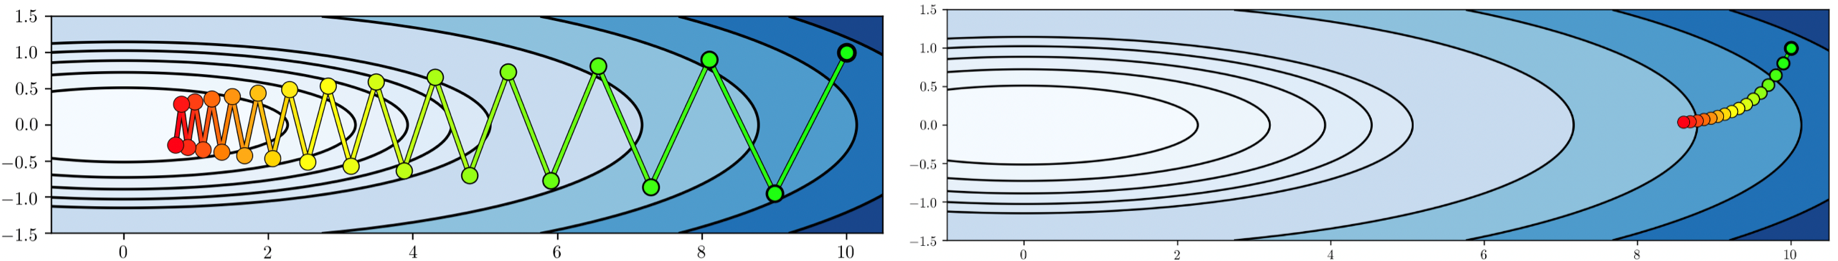


Could we walk in long strides while avoiding the pitfalls of zigzagging? The answer is yes and the _**conjugate gradient**_ is proposed for this purpose. The strategy, to put it simply, is to choose a direction that is in conjugacy with subsequent search directions. So, the sequence of directions do not offset each other; there is no detour and the path is short. 

This is done by taking into account the last iteration's direction ($d_{i-1}$) weighted by $\beta_i$ to make sure that the past and the current directions are conjugate. That is,

\begin{align}
\mathbf{\theta}_i  = \mathbf{\theta}_{i-1} + s_i d_i 
\end{align}

where

\begin{align}
d_i = g(\theta_{i-1}) + \beta_i d_{i-1}
\end{align}


Various rules are possible for calculating $\beta$ (e.g. Polak-Ribiere). Conjugacy will eventually be lost, so the search direction must periodically be reset to the steepest descent direction.


    
    

### Grid Search

> <div class="alert alert-block alert-info"> 
> Use no gradients. Discretize the parameter space into fine grid and selecting the values which achieves the maximum on the grid.
> </div>
 
The brute-force method is feasible when the dimension of the parameter space is small. One advantage of the approach is that no derivatives are needed, which can be useful if differentiation is complicated. When the objective function is globally concave, the approach will find an approximation to the maximum. While care should be exercised in taking them as final estimates, grid estimates are useful as initial conditions for other algorithms.

### Nelder-Mead

  - Instead of using gradient information, Nelder-Mead is a direct search method. The algorithm begins by evaluating the objective function at n + 1 points. These n + 1 points form a so-called simplex in the n-dimensional decision space. It keeps track of the function values at these n + 1 points and performs one of four actions: reflect, expand, contract, or shrink. Basically, the goal is to iteratively replace the worst point with a better point. More information can be found in Nelder and Mead (1965), Lagarias, et al (1998) or Gao and Han (2010). (based on Optim.jl)
  
  - This method is simple and has demonstrated enduring popularity, despite the later discovery that it fails to converge at all for some functions (and examples may be constructed in which it converges to point that is not a local minimum). Anecdotal evidence suggests that it often performs well even for noisy and/or discontinuous objective functions. (based on NLopt.jl document)
  
  

- It is also called pattern search, direct search, derivative-free search, or black-box search.


- Updated, need to be incorporated.

  - Which is a simplex method.
  
  - simplex: (my words) The smallest unit that could represent a unit in a given dimension. For a 2D, the smallest unit that represents a plan is a triangle which has 3 vertices. For a 1D, the smallest unit is a line which has 2 vertices. So, a simplex in a n-dimension requires n+1 vertices.

  - Instead of using gradient information, Nelder-Mead is a direct search method. It keeps track of the function value at a number of points in the search space. Together, the points form a simplex. Given a simplex, we can perform one of four actions: reflect, expand, contract, or shrink. Basically, the goal is to iteratively replace the worst point with a better point. More information can be found in Nelder and Mead (1965), Lagarias, et al (1998) or Gao and Han (2010). (from Optim.jl document)
  
  - This method is simple and has demonstrated enduring popularity, despite the later discovery that it fails to converge at all for some functions (and examples may be constructed in which it converges to point that is not a local minimum). Anecdotal evidence suggests that it often performs well even for noisy and/or discontinuous objective functions. I would tend to recommend the Subplex method (below) instead, however. (from NLopt.jl document)
  
  - Good intro: https://www.youtube.com/watch?v=vOYlVvT3W80&ab_channel=MilesChen

  - A good gif: http://takashiida.floppy.jp/en/education-2/gif-nelder-mead/  


# Final Remark


- non-gradient methods vs. gradient-based methods:
  - Non-gradient methods are less sensitive to local conditions and convergence is generally not guaranteed.
  - Gradient-based methods are sensitive to local conditions and can converge more quickly. The downside is that if the initial values are not good and the local information is inadequate (such as a flat profile of the function), the methods may be stuck and the convergence fails.  
  - A useful strategy is to use non-gradient methods for zooming into the maximum's neighborhood before switching to the gradient-based methods. 


# Other Info

## Local Descent

- Descent Direction Methods use a local model (i.e., one that obtained from the first- or second-order Taylor approximation) to incrementally improve design point until some convergence criteria is met.
  - Check whether $\mathbf{d}^{(k)}$ satisfies the termination conditions. If it does, terminate;
otherwise proceed to the next step.
  - Decide the _**descent direction**_ $\mathbf{d}^{(k)}$ using local information such as the gradient
or Hessian. 
  - Decide the _**step size**_ (also called the *learning rate*) $\alpha^{(k)}$.
  - Compute a new design point $\mathbf{x}^{(k+1)}$ according to:
\begin{equation}
   \mathbf{x}^{(k)} + \alpha^{(k)}\mathbf{d}^{(k)} \rightarrow \mathbf{x}^{(k+1)}
\end{equation}

- Different optimization methods have different ways to choose $\alpha$ and $\mathbf d$.

- If use the information from gradient, it may be called the gradient descent.
  - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21

- I think Newton, BFGS, etc., are all local descent algorithms. So, what is non-local descent? Well, the global optimization algorithms certainly aren't. I think the simplex method, the Nelder-Mead method are not local descent as well. So, are all non-gradient-based methods not local descent methods?

- Useful info: https://nicoguaro.github.io/posts/numerical_challenge/numerical-06/
